In [1]:
        ### IMPORTATION DES LIBRAIRIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import pointbiserialr, f_oneway, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer                # utilisé ni sur le training ni sur le test
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

In [3]:
        ### IMPORTATION DU DATAFRAME

In [4]:
# Observation des colonnes du DataFrame sur les 5ères lignes :
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head().T 

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [5]:
print(df.dtypes) # Affichage des types de données de chaque colonne

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Nous avons 26 variables numériques et 9 variables catégorielles

In [7]:
print("Nombres de lignes et de colonnes :", df.shape)
print("------")
print("Descriptions statistiques : ", df.describe(include="all").T)

Nombres de lignes et de colonnes : (1470, 35)
------
Descriptions statistiques :                             count unique                     top  freq  \
Age                       1470.0    NaN                     NaN   NaN   
Attrition                   1470      2                      No  1233   
BusinessTravel              1470      3           Travel_Rarely  1043   
DailyRate                 1470.0    NaN                     NaN   NaN   
Department                  1470      3  Research & Development   961   
DistanceFromHome          1470.0    NaN                     NaN   NaN   
Education                 1470.0    NaN                     NaN   NaN   
EducationField              1470      6           Life Sciences   606   
EmployeeCount             1470.0    NaN                     NaN   NaN   
EmployeeNumber            1470.0    NaN                     NaN   NaN   
EnvironmentSatisfaction   1470.0    NaN                     NaN   NaN   
Gender                      1470      2   

In [8]:
        ### CHOIX DU SUJET D'ETUDE      = Etude des raisons de l'attrition dans l'entreprise.

In [9]:
# Vérification des doublons :
doublons =df.duplicated().sum()
doublons

np.int64(0)

In [10]:
# pas de doublon

In [11]:
# Vérification des valeurs manquantes :
valeurs_manquantes = df.isnull().any()
print(valeurs_manquantes)

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [12]:
# pas de valeur manquante

In [13]:
# Repérage des colonnes ayant une valeur identique pour tous les employés :
identical_columns = df.columns[df.nunique() == 1]
identical_columns

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

In [14]:
#'EmployeeCount' va nous servir pour faire l'EDA avec le logiciel TABLEAU, donc nous gardons cette colonne.
#'Over18' et 'StandardHours' sont des colonnes que nous allons éliminer puisqu'elles contiennent la même valeur pour tous les employés et donc ne présentent pas d'intérêt pour notre étude.

In [15]:
# Repérage des colonnes comportant des valeurs unqiques à chaque ligne :
unique_columns = df.columns[df.nunique() == df.shape[0]]
print(unique_columns)

Index(['EmployeeNumber'], dtype='object')


In [16]:
# Nous allons supprimer 'EmployeeNumber' car cette colonne contient des valeurs propres à chaque employé, ceci afin de les identifier, mais inutiles pour notre étude puisque nous n'avons pas besoin de joindre différentes tables ensembles.

In [17]:
print(df.nunique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [18]:
# On voit que la variable numérique 'PerformanceRating' n'est dispersée que sur deux valeurs, or il s'agit d'une variable catégorielle codée (=variable catégorielle discrète) 
# D'autre part, avec l'analyse descriptive faite en amont, nous savons que seules les catégories 3 et 4 sont présentes pour cette variable (pour 4 possibilités)
# Nous l'éliminons car elle n'est pas assez dispersée.

In [19]:
# Suppression des 3 colonnes inutiles à l'EDA ET au MACHINE LEARNING :

df.drop(['Over18', 'StandardHours','EmployeeNumber','PerformanceRating'], axis=1, inplace=True)

In [20]:
# Vérification
print (df.shape)
df.columns

(1470, 31)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
#### Repérage des OUTLIERS pour les colonnes ayant des valeurs numériques continues non ordonnées

# colonnes concernées : 
# "MonthlyIncome"
# "PercentSalaryHike"
# "MonthlyRate"
# "DailyRate"
# "HourlyRate"



<Axes: ylabel='MonthlyIncome'>

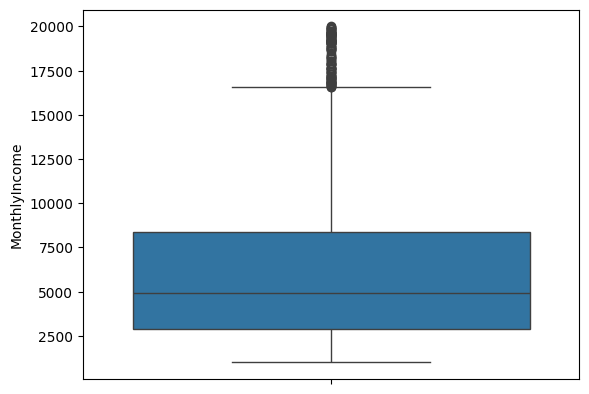

In [22]:
# Box Plot "MonthlyIncome"
sns.boxplot(df["MonthlyIncome"])

In [23]:
# Calcul des quartiles
Q1_MI = df["MonthlyIncome"].quantile(0.25)  # Premier quartile (Q1)
Q3_MI = df["MonthlyIncome"].quantile(0.75)  # Troisième quartile (Q3)
IQR_MI = Q3_MI - Q1_MI  # Intervalle interquartile

# Définition des bornes des valeurs aberrantes
borne_inf_MI = Q1_MI - 1.5 * IQR_MI
borne_sup_MI = Q3_MI + 1.5 * IQR_MI
print("Borne inférieure:", borne_inf_MI)
print("Borne supérieure:", borne_sup_MI)


Borne inférieure: -5291.0
Borne supérieure: 16581.0


In [24]:
# On peut voir que les valeurs supérieures à 16 581 réagissent comme des valeurs atypiques pour la colonne -MonthlyIncome-.
# Cependant, bien qu'extrêmes, ces valeurs ne sont pas aberrantes. Elles sont le resultat de la politique RH de l'entreprise.

<Axes: ylabel='PercentSalaryHike'>

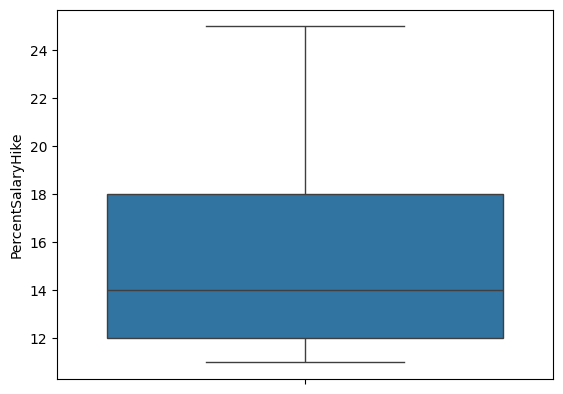

In [25]:
# Box Plot "PercentSalaryHike"
sns.boxplot(df["PercentSalaryHike"])

In [26]:
# Pas de valeurs atypiques à éliminer pour la colonne -PercentSalaryHike-.

<Axes: ylabel='MonthlyRate'>

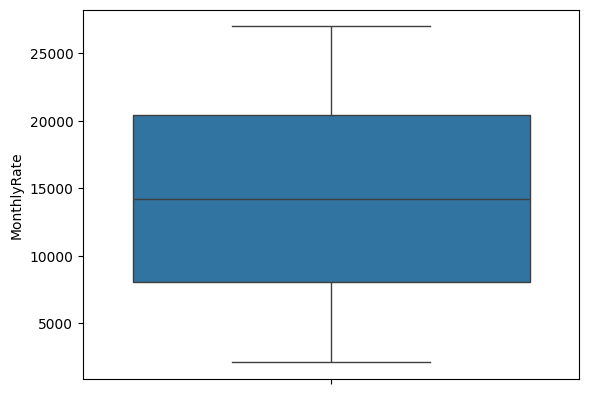

In [27]:
# Box Plot "MonthlyRate"
sns.boxplot(df["MonthlyRate"])

In [28]:
# Pas de valeurs atypiques à éliminer pour la colonne -MonthlyRate-.

<Axes: ylabel='DailyRate'>

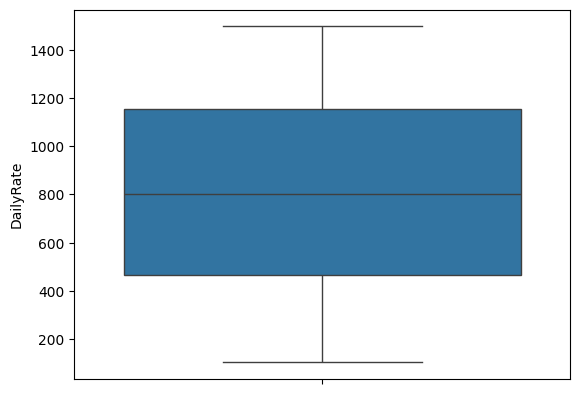

In [29]:
# Box Plot "DailyRate"
sns.boxplot(df["DailyRate"])

In [30]:
# Pas de valeurs atypiques à éliminer pour la colonne -DailyRate-.

<Axes: ylabel='HourlyRate'>

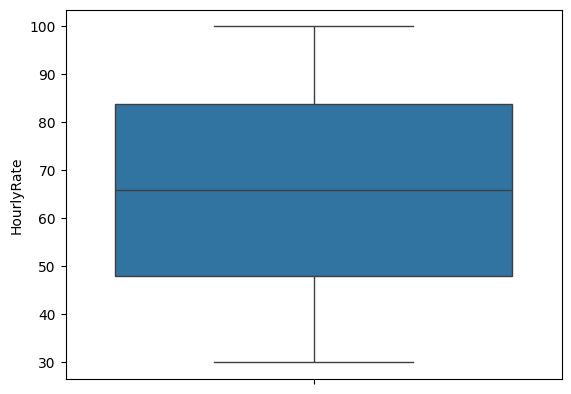

In [31]:
# Box Plot "HourlyRate"
sns.boxplot(df["HourlyRate"])

In [32]:
# Pas de valeurs atypiques à éliminer pour la colonne -HourlyRate-.

In [33]:
# Pour l'EDA et pour une facilité de lecture, nous allons changer les variables numériques discrètes et ordinales en variables catégorielles.

In [34]:
# Changement des variables numériques discrètes et ordinales en variables catégorielles :
df["Education"] = df["Education"].replace({1:"1_Below College",2:"2_College",3:"3_Bachelor",4:"4_Master",5:"5_Doctor"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"1_Faible",2:"2_Moyen",3:"3_Elevée",4:"4_Très élevée"})
df["JobInvolvement"] = df["JobInvolvement"].replace({1:"1_Faible",2:"2_Moyen",3:"3_Elevée",4:"4_Très élevée"})
df["JobLevel"] = df["JobLevel"].replace({1:"1_Débutant",2:"2_Junior",3:"3_Confirmé",4:"4_Senior",
                                         5:"5_Expert"})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"1_Faible",2:"2_Moyen",3:"3_Elevée",4:"4_Très élevée"})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"1_Faible",2:"2_Moyen",3:"3_Elevée",4:"4_Très élevée"})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"1_Mauvais",2:"2_Bon",3:"3_Très bon",4:"5_Parfait"})


In [35]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction    object
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [36]:
# création d'un fichier .csv pour la réalisation de représentations graphiques avec le logiciel TABLEAU
# afin de proposer une description visuelle de notre jeu de données
#df.to_csv("----date-------------IBM_projet_groupe_nett_EDA.csv")
#df.to_csv("IBM_EDA-fichier_pour_TABLEAU.csv")

In [37]:
print("Suppression d'une colonne inutile au MACHINE LEARNING :")

df.drop(['EmployeeCount', 'MaritalStatus'], axis=1, inplace=True)
df.head(2)

Suppression d'une colonne inutile au MACHINE LEARNING :


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2_College,Life Sciences,2_Moyen,Female,...,11,1_Faible,0,8,0,1_Mauvais,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1_Below College,Life Sciences,3_Elevée,Male,...,23,4_Très élevée,1,10,3,3_Très bon,10,7,1,7


In [38]:
### Analyses des corrélations entre les variables 

In [39]:
        ### CORRELOGRAMME 

In [40]:
#### Construction d'un correlogramme  = matrice de corrélation
# = analyse de la corrélation entre les variables quantitatives uniquement
# = permet de voir si des variables numériques sont corrélées entre elles
# = Analyse univariée

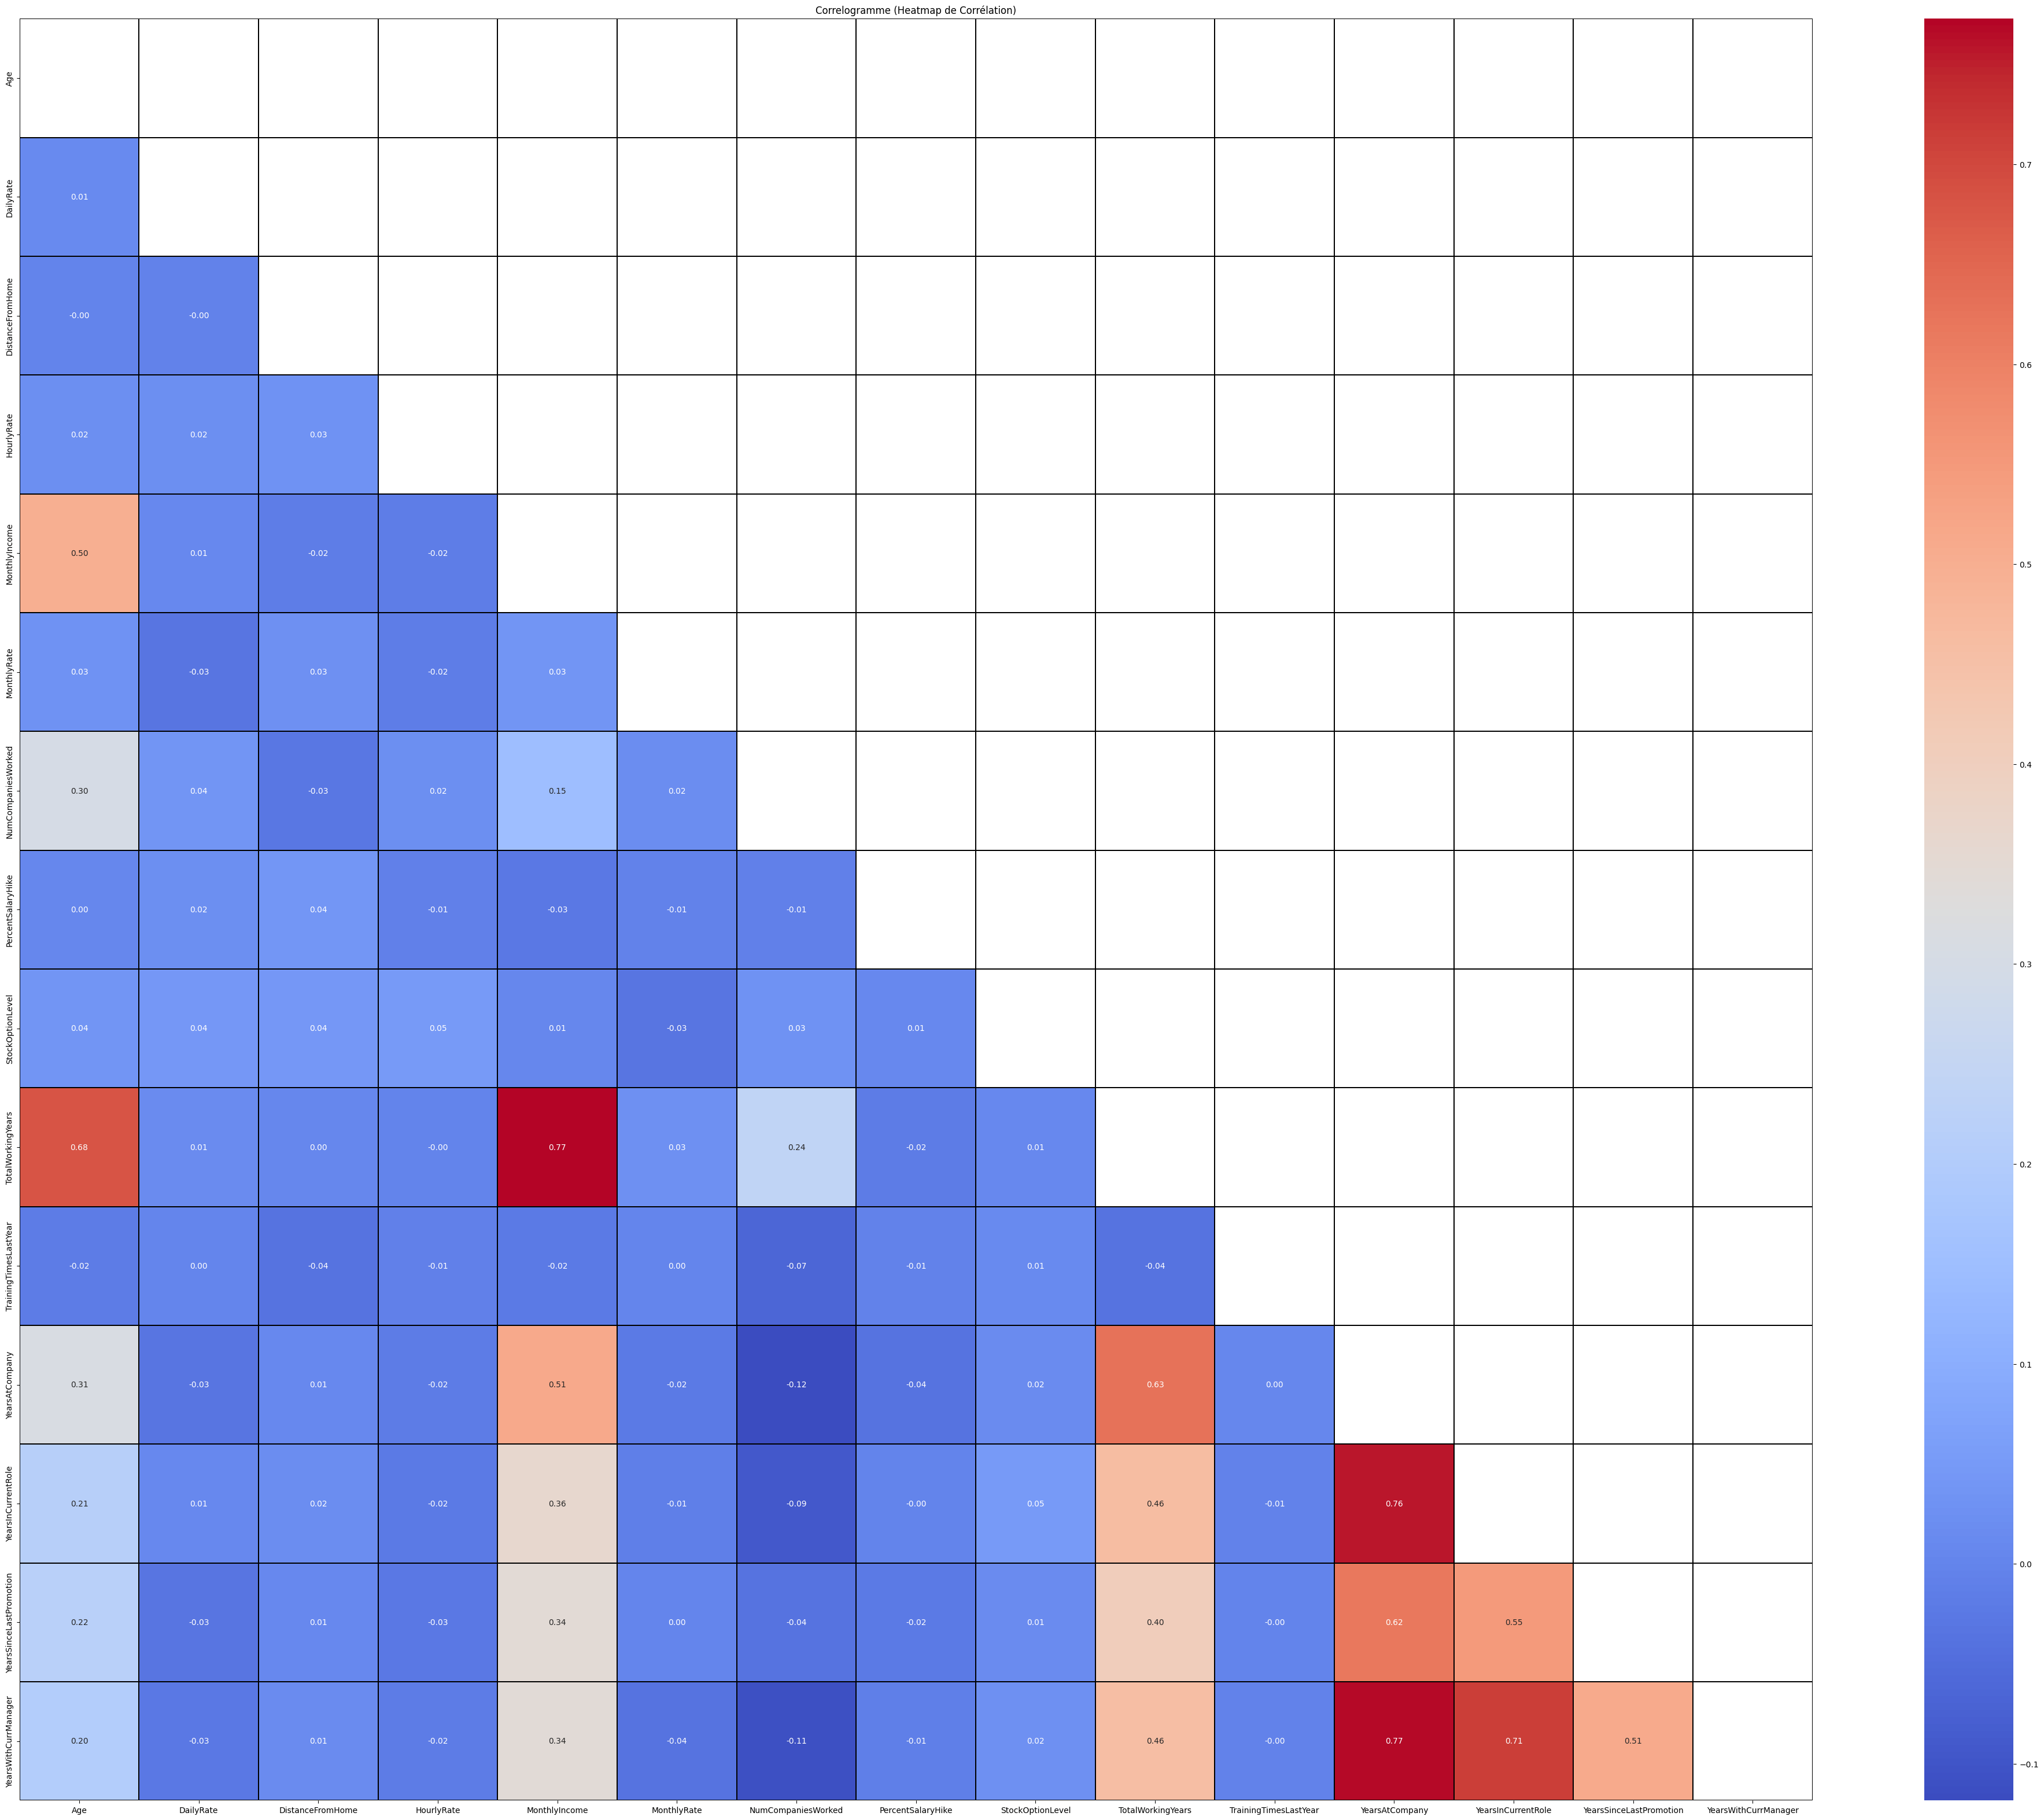

In [41]:
# sélection des variables numériques
numeric_features_correlogram = df.select_dtypes(include=[np.number])

# Calcul de la matrice de corrélation
corr_matrix = numeric_features_correlogram.corr()

# création d'un masque pour la partie triangulaire supérieure
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Affichage de la matrice de corrélation
kot= corr_matrix[(corr_matrix != 1.00) & (corr_matrix != -1.00) & (corr_matrix != 0.00)]
plt.figure(figsize=(50, 40))
sns.heatmap(kot, annot=True, cmap='coolwarm', mask=mask,fmt= ".2f",linewidths=0.2, linecolor='black', cbar=True)
plt.title('Correlogramme (Heatmap de Corrélation)')
plt.show()


In [42]:
        ### VARIANCE INFLATION FACTOR (VIF)

In [43]:
### CALCUL du VIF = Variance Inflation Factor
# pour les variables quantitatives uniquement (exclure la cible si elle est numérique)
# permet de voir si des variables numériques sont corrélées entre elles
# car le corrélogramme nous donne des corrélations inférieures à 0.8, mais fortes tout de même
# Le VIF va nous aider à éliminer des prédicteurs si nécessaires

# Sélection des variables numériques uniquement (exclure la cible si elle est numérique)
X_VIF = df.select_dtypes(include=[np.number])

# Standardisation des données
X_scaled = StandardScaler().fit_transform(X_VIF)

# Calcul du VIF
VIF_data = pd.DataFrame()
VIF_data["Variables"] = X_VIF.columns
VIF_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Affichage des résultats
print(VIF_data)

                  Variables       VIF
0                       Age  1.993289
1                 DailyRate  1.011556
2          DistanceFromHome  1.009449
3                HourlyRate  1.006740
4             MonthlyIncome  2.528847
5               MonthlyRate  1.009022
6        NumCompaniesWorked  1.244055
7         PercentSalaryHike  1.006234
8          StockOptionLevel  1.014230
9         TotalWorkingYears  4.649899
10    TrainingTimesLastYear  1.007529
11           YearsAtCompany  4.564928
12       YearsInCurrentRole  2.693085
13  YearsSinceLastPromotion  1.669009
14     YearsWithCurrManager  2.748116


In [44]:
# pas de multicolinéarité entre nos variables prédictives numériques
# Nous ne pouvons pas vérifier les corrélations avec notre variable cible car elle est catégorielle 

In [45]:
# ANALYSES DE CORRELATION ENTRE LES VARIABLES PREDICTIVES ET LA CIBLE

# Puisque notre variable cible est catégorielle et binaire, 
# nous allons utiliser le test de point bisérial pour les variables numériques 
# et le test du chi2 pour les variables catégorielles.


In [46]:
# TEST DE POINT BISERIAL
# pour les variables numériques uniquement et dans le cas d'une varirable cible catégorielle binaire

In [ ]:
# Variable cible :
df["Attrition"]= df["Attrition"].replace({"Yes": 1, "No": 0}) 
cible = df["Attrition"]


In [48]:
# Liste des variables numériques à analyser :
variables_num= ['Age', 'DailyRate','DistanceFromHome', 
                'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [49]:
print("TEST DE POINT BISERIAL :")
for i in variables_num:
    corr, p_value = pointbiserialr(df[i], cible)
    
    print(f"Entre {i} et Attrition : {round(corr,3)}, p-value: {round(p_value,3)}")

    if p_value < 0.05:
        print("La corrélation est significative")
        print("-" * 32)  # Séparation des résultats pour chaque variable
    else:
        print("La corrélation n'est pas significative")
        print("-" * 32)  # Séparation des résultats pour chaque variable


TEST DE POINT BISERIAL :
Entre Age et Attrition : -0.159, p-value: 0.0
La corrélation est significative
--------------------------------
Entre DailyRate et Attrition : -0.057, p-value: 0.03
La corrélation est significative
--------------------------------
Entre DistanceFromHome et Attrition : 0.078, p-value: 0.003
La corrélation est significative
--------------------------------
Entre HourlyRate et Attrition : -0.007, p-value: 0.793
La corrélation n'est pas significative
--------------------------------
Entre MonthlyIncome et Attrition : -0.16, p-value: 0.0
La corrélation est significative
--------------------------------
Entre MonthlyRate et Attrition : 0.015, p-value: 0.561
La corrélation n'est pas significative
--------------------------------
Entre NumCompaniesWorked et Attrition : 0.043, p-value: 0.096
La corrélation n'est pas significative
--------------------------------
Entre PercentSalaryHike et Attrition : -0.013, p-value: 0.606
La corrélation n'est pas significative
--------

In [50]:
# Test de Chi² pour les variables catégorielles


In [51]:
print("TEST DU CHI2 :")
variables_cat = ['BusinessTravel', 'Department', 'Education','EducationField',
                'EnvironmentSatisfaction','Gender', 'JobInvolvement',
                'JobLevel', 'JobRole', 'JobSatisfaction',
                'OverTime', 'RelationshipSatisfaction', 'WorkLifeBalance']

for i in variables_cat:
    contingency_table = pd.crosstab(df[i], df['Attrition'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print (f"Le Chi2 entre {i} et Attrition est : {round(chi2_stat,3)}, avec pour p-value: {round(p_value,3)}")
    if p_value < 0.05:
        print(f"La relation entre {i} et Attrition est statistiquement significative")
        print("-" * 32)  # Séparation des résultats pour chaque variable
    else:
        print(f"La relation entre {i} et Attrition n'est pas statistiquement significative")
        print("-" * 32)  # Séparation des résultats pour chaque variable

    


TEST DU CHI2 :
Le Chi2 entre BusinessTravel et Attrition est : 24.182, avec pour p-value: 0.0
La relation entre BusinessTravel et Attrition est statistiquement significative
--------------------------------
Le Chi2 entre Department et Attrition est : 10.796, avec pour p-value: 0.005
La relation entre Department et Attrition est statistiquement significative
--------------------------------
Le Chi2 entre Education et Attrition est : 3.074, avec pour p-value: 0.546
La relation entre Education et Attrition n'est pas statistiquement significative
--------------------------------
Le Chi2 entre EducationField et Attrition est : 16.025, avec pour p-value: 0.007
La relation entre EducationField et Attrition est statistiquement significative
--------------------------------
Le Chi2 entre EnvironmentSatisfaction et Attrition est : 22.504, avec pour p-value: 0.0
La relation entre EnvironmentSatisfaction et Attrition est statistiquement significative
--------------------------------
Le Chi2 entre 

In [52]:
### PREPARATION DES DONNEES POUR LE MACHINE LEARNING

In [53]:
# on enlève une partie de notre population,
# Les personnes de plus de 55 ans ne doivent pas non plus prendre le risque de partir
df = df[df["Age"] < 55]
df["Age"].describe().T

count    1401.000000
mean       35.941470
std         8.176325
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        54.000000
Name: Age, dtype: float64

In [54]:
# Suppression de variables pour lesquelles la corrélation avec la variable cible n'est pas significative

    # Variables numériques à supprimer :
    # 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'HourlyRate','MonthlyRate' 

    # variables catégorielles à supprimer :
    # 'Gender', 'Education', 'RelationshipSatisfaction'

# Nous allons également supprimer la variable 'DailyRate', même si elle est significative, elle montre la même chose que la variable 'MonthlyIncome'
# D'autre part, nous avons eu du mal à comprendre ce qu'elle représentait, ou bien il y a des erreurs dans la collecte des données.

In [55]:
df.drop(['NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'HourlyRate','MonthlyRate','Gender', 'Education', 'RelationshipSatisfaction', 'DailyRate'], axis=1, inplace=True)
# verification du nombre de lignes et de colonnes
print("Nombres de lignes et de colonnes :", df.shape)
df.columns

Nombres de lignes et de colonnes : (1401, 20)


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [56]:
        #### PROBLEMES repérés dans le DATAFRAME 
# 
# la valeur -HumanResources- correspond à une catégorie de la colonne 'JobRole', une catégorie de la colonne 'Department' et une catégorie de la colonne 'EducationField'.
# Nous changeons les dénominations des valeurs :
#       -HumanResources_Job pour 'JobRole'
#       -HumanResources_Dpt pour 'Department'   
#       -HumanResources_Studies pour 'EducationField'

# Il y a deux colonnes dont les valeurs sont 'Yes' ou 'No' , donc nous allons changer :
#       -Attrition-Yes pour le Yes de la colonne 'Attrition'  
#       -No Attrition-No pour le No de la colonne 'Attrition'  
#       -OverTime-Yes pour le Yes de la colonne 'OverTime'   
#       -OverTime-No pour le No de la colonne 'OverTime'

In [57]:
### Encodage de valeurs unique entre les colonnes en vue du prepocessing.
df["JobRole"]= df["JobRole"].replace({"Human Resources" : "HumanResources_Job"})
df["Department"]= df["Department"].replace({"Human Resources" : "HumanResources_Dpt"})
df["EducationField"]= df["EducationField"].replace({"Human Resources" : "HumanResources_Studies"})
df["Attrition"] = df["Attrition"].replace({1: "Attrition-Yes", 0: "Attrition-No"})
df["OverTime"] =df["OverTime"].replace({"No" : "OverTime-No", "Yes" : "OverTime-Yes"})

In [58]:
df.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction    object
JobInvolvement             object
JobLevel                   object
JobRole                    object
JobSatisfaction            object
MonthlyIncome               int64
OverTime                   object
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance            object
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsWithCurrManager        int64
dtype: object

In [59]:
### Vérification des variables catégorielles :
categorical_column_names = ["Attrition","BusinessTravel","Department", "EducationField","EnvironmentSatisfaction",
                            "JobInvolvement","JobLevel","JobRole","JobSatisfaction",
                            "OverTime","WorkLifeBalance"]
for col in categorical_column_names:
    index = df.columns.get_loc(col)
    values = df[col].unique()
    print(f"L'index de la colonne '{col}' est: {index}. Et les catégories sont : {values}")

L'index de la colonne 'Attrition' est: 1. Et les catégories sont : ['Attrition-Yes' 'Attrition-No']
L'index de la colonne 'BusinessTravel' est: 2. Et les catégories sont : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
L'index de la colonne 'Department' est: 3. Et les catégories sont : ['Sales' 'Research & Development' 'HumanResources_Dpt']
L'index de la colonne 'EducationField' est: 5. Et les catégories sont : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'HumanResources_Studies']
L'index de la colonne 'EnvironmentSatisfaction' est: 6. Et les catégories sont : ['2_Moyen' '3_Elevée' '4_Très élevée' '1_Faible']
L'index de la colonne 'JobInvolvement' est: 7. Et les catégories sont : ['3_Elevée' '2_Moyen' '4_Très élevée' '1_Faible']
L'index de la colonne 'JobLevel' est: 8. Et les catégories sont : ['2_Junior' '1_Débutant' '3_Confirmé' '4_Senior' '5_Expert']
L'index de la colonne 'JobRole' est: 9. Et les catégories sont : ['Sales Executive' 'Research Scientist' 'La

In [60]:
            #### MACHINE LEARNING ####

In [61]:
    #### MISSING VALUE MANAGEMENT ####
# Nous n'avions pas de valeurs manquantes dans le Dataframe.

In [62]:
     #### FEATURE / TARGET SPLIT #####

## On choisit les colonnes qui seront nos features :
features_list = df.columns[[0] + list(range(2,20))]

    #on définit notre X :
X = df.loc[:,features_list]   
    
    # on définit y :
y = df.loc[:,"Attrition"]

In [63]:
 #### TRAIN / TEST SPLIT ####       (AVANT SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [64]:
    #### SCALING & ENCODING ####  

 # préparation des paramètres de la pipeline de preprocessing
    # Standard SCALING :
numeric_features= ['Age', 'DistanceFromHome',  
        'MonthlyIncome', 
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsInCurrentRole',
        'YearsWithCurrManager']    # liste d'index de mes colonnes numériques
numeric_transformer = StandardScaler()
  

    # ONE HOT ENCODING :
categorical_features = ['BusinessTravel', 'Department', 'EducationField','EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel','JobSatisfaction', 'JobRole',  'OverTime','WorkLifeBalance']  # liste d'index de nos colonnes catégorielles
X[categorical_features] = X[categorical_features].astype("category")
print(X[categorical_features])
categoric_transformer = OneHotEncoder(drop="first",handle_unknown="ignore")

    #avec l'encodeur OneHotEncoder qui va remplacer nos valeurs catégorielles par des valeurs integer et supprimer la premère variable puisque l'encodage des autres donne l'information,

    
    # création de notre pipeline processing avec ColumnTransformer
    # on référence les transformer qu'on va utiliser, mis dans des tuples
feature_encoder = ColumnTransformer(
    transformers =[          
        ("cat", categoric_transformer, categorical_features),
        ("num",numeric_transformer, numeric_features)]
)

X_train_transformed = feature_encoder.fit_transform(X_train)
X_test_transformed = feature_encoder.transform(X_test)


         BusinessTravel              Department EducationField  \
0         Travel_Rarely                   Sales  Life Sciences   
1     Travel_Frequently  Research & Development  Life Sciences   
2         Travel_Rarely  Research & Development          Other   
3     Travel_Frequently  Research & Development  Life Sciences   
4         Travel_Rarely  Research & Development        Medical   
...                 ...                     ...            ...   
1465  Travel_Frequently  Research & Development        Medical   
1466      Travel_Rarely  Research & Development        Medical   
1467      Travel_Rarely  Research & Development  Life Sciences   
1468  Travel_Frequently                   Sales        Medical   
1469      Travel_Rarely  Research & Development        Medical   

     EnvironmentSatisfaction JobInvolvement    JobLevel JobSatisfaction  \
0                    2_Moyen       3_Elevée    2_Junior   4_Très élevée   
1                   3_Elevée        2_Moyen    2_Junior  

In [65]:
# Récupérer les noms des nouvelles colonnes
new_columns = feature_encoder.get_feature_names_out()
new_columns


array(['cat__BusinessTravel_Travel_Frequently',
       'cat__BusinessTravel_Travel_Rarely',
       'cat__Department_Research & Development', 'cat__Department_Sales',
       'cat__EducationField_Life Sciences',
       'cat__EducationField_Marketing', 'cat__EducationField_Medical',
       'cat__EducationField_Other',
       'cat__EducationField_Technical Degree',
       'cat__EnvironmentSatisfaction_2_Moyen',
       'cat__EnvironmentSatisfaction_3_Elevée',
       'cat__EnvironmentSatisfaction_4_Très élevée',
       'cat__JobInvolvement_2_Moyen', 'cat__JobInvolvement_3_Elevée',
       'cat__JobInvolvement_4_Très élevée', 'cat__JobLevel_2_Junior',
       'cat__JobLevel_3_Confirmé', 'cat__JobLevel_4_Senior',
       'cat__JobLevel_5_Expert', 'cat__JobSatisfaction_2_Moyen',
       'cat__JobSatisfaction_3_Elevée',
       'cat__JobSatisfaction_4_Très élevée',
       'cat__JobRole_HumanResources_Job',
       'cat__JobRole_Laboratory Technician', 'cat__JobRole_Manager',
       'cat__JobRole_Manuf

In [66]:
 # LABEL ENCODING

label_encoder = LabelEncoder() 
y_train_transformed = label_encoder.fit_transform(y_train)
y_test_transformed = label_encoder.transform(y_test)
print("preprocessing sur y exécuté.")


preprocessing sur y exécuté.


In [67]:
y_test_transformed


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [68]:
y_train_transformed

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [69]:
# Importation de SMOTE 
from imblearn.over_sampling import SMOTE

y_series = pd.Series(y)

# Vérification de la répartition des classes
print("Répartition avant SMOTE:", y_series.value_counts())  # Classe majoritaire ≫ minoritaire



Répartition avant SMOTE: Attrition
Attrition-No     1175
Attrition-Yes     226
Name: count, dtype: int64


In [70]:
counts = np.bincount(y_train_transformed)
print(f"Nombre de 0 : {counts[0]}")
print(f"Nombre de 1 : {counts[1]}")

Nombre de 0 : 822
Nombre de 1 : 158


In [71]:
# Application de SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train_transformed)

# Vérification de la nouvelle répartition des classes
print("Répartition avant SMOTE:", np.bincount(y_train_transformed))  
print("Répartition après SMOTE:", np.bincount(y_train_resampled))# Équilibré maintenant !

Répartition avant SMOTE: [822 158]
Répartition après SMOTE: [822 822]


In [72]:
                                                ################ LOGISTIC REGRESSION ##################

In [ ]:
"""
#Recherche des hyperparametres optimisés
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définir les hyperparamètres à tester
param_grid = {
    'C': [0.0005, 0.001,0.01, 0.1, 1, 10, 20],  # Valeurs possibles pour la régularisation
    'penalty': ['l1', 'l2'],        # Type de régularisation
    'solver': ['liblinear', 'saga'], # Solveur à utiliser
    'max_iter': [100, 200, 300],    # Nombre d'itérations
    'class_weight': ['balanced', None]  # Gérer l'équilibre des classes
}

# Instancier le modèle
LR_classifier = LogisticRegression(random_state=42)

# Instancier le GridSearchCV
grid_search = GridSearchCV(estimator=LR_classifier, param_grid=param_grid, 
                           cv=10, scoring='recall', n_jobs=-1, verbose=1)

# Appliquer GridSearchCV pour trouver les meilleurs paramètres
grid_search.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs paramètres et le score associé
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# Utiliser le meilleur modèle trouvé
best_LR_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best_LR = best_LR_model.predict(X_test_transformed)
print("Accuracy sur test set avec meilleur modèle : ", accuracy_score(y_test_transformed, y_pred_best_LR))
"""

In [74]:
# RESULTATS OBTENUS :
# Fitting 10 folds for each of 168 candidates, totalling 1680 fits
#Meilleurs paramètres trouvés :  {'C': 20, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
#Meilleur score :  0.8583860283047275
#Accuracy sur test set avec meilleur modèle :  0.8119047619047619

In [75]:
            ### Build a Logistic Regression model           
# Training model avec hyperparametres optimisés
print("Training model...")
LR_classifier = LogisticRegression(C=20, 
                                   class_weight='balanced', 
                                   max_iter=100, 
                                   penalty='l1', 
                                   solver='liblinear', 
                                   random_state=42)  # Instanciate model 
LR_classifier.fit(X_train_resampled, y_train_resampled)  # Fit model


Training model...


LogisticRegression(C=20, class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

In [76]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_LR = LR_classifier.predict(X_train_resampled)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred_LR[0:5])


Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[1 0 0 0 1]


In [77]:
print("Classes uniques dans y_train_transformed:", set(y_train_resampled))
print("Classes uniques dans y_test_transformed:", set(y_train_pred_LR))

Classes uniques dans y_train_transformed: {np.int64(0), np.int64(1)}
Classes uniques dans y_test_transformed: {np.int64(0), np.int64(1)}


In [78]:
                    ##### TESTING PIPELINE #####

In [79]:
# Predictions on testing set
print("Predictions on test set...")
y_test_pred_LR = LR_classifier.predict(X_test_transformed)
print("...Done.")
print()

print("#### First five predictions on TEST set ####")
print(y_test_pred_LR[0:5])

Predictions on test set...
...Done.

#### First five predictions on TEST set ####
[0 0 0 0 0]


In [80]:
#### Evaluation model ####  Logistic Regression

--- Assessment of performances ---


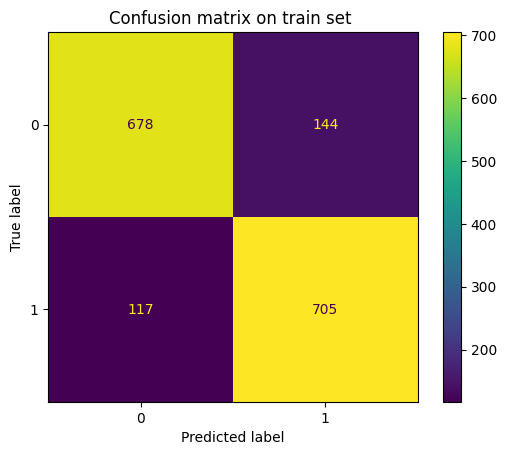

accuracy-score on train set :  0.8412408759124088
[[678 144]
 [117 705]]


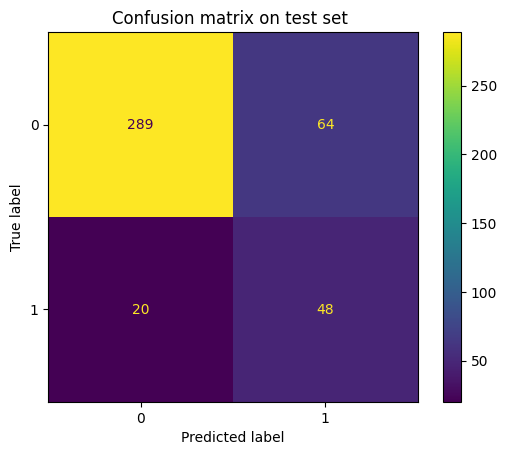

accuracy-score on test set :  0.8004750593824228
[[289  64]
 [ 20  48]]


In [81]:
### Assessment of performances ###      
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_LR_train = confusion_matrix(y_train_resampled, y_train_pred_LR, labels=LR_classifier.classes_)
cm_display_LR_train = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_train_pred_LR)
cm_display_LR_train.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", LR_classifier.score(X_train_resampled, y_train_resampled))
cm_array_LR_train = np.array(cm_LR_train)
print(cm_array_LR_train)

cm_LR_test = confusion_matrix(y_test_transformed, y_test_pred_LR, labels=LR_classifier.classes_)
cm_display_LR_test = ConfusionMatrixDisplay.from_predictions(y_test_transformed, y_test_pred_LR)
cm_display_LR_test.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", LR_classifier.score(X_test_transformed, y_test_transformed))
cm_array_LR_test = np.array(cm_LR_test)
print(cm_array_LR_test)


In [82]:
# Check coefficients Logistic Regression
print("Résultat de notre modèle de Régression Logistique :")
print("coefficients are: ", LR_classifier.coef_.squeeze()) 
print("Constant is: ", LR_classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])



Résultat de notre modèle de Régression Logistique :
coefficients are:  [ 3.09319489  1.95079139  0.84543599  0.79045713 -1.77336874 -1.13725331
 -1.46409249 -1.61218808 -0.70804557 -1.45095554 -1.64606717 -2.37593831
 -1.45932662 -1.69094507 -3.09787784 -1.16273391  2.01905253  2.12603224
  4.3002042  -1.17680811 -0.94145124 -1.71893748  0.50321031  1.34827614
 -1.1895009  -0.08879269 -2.74750551  0.44291837  2.05562933  1.80892581
  2.57370679 -1.35294866 -1.79474132 -0.53878275  0.02348615  0.43389035
 -0.73429164 -0.76189947 -0.80640778 -0.33685422  0.15010993 -0.3124733
 -0.10657983]
Constant is:  [1.04968894]
All transformers are:  [('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'JobRole', 'OverTime', 'WorkLifeBalance']), ('num', StandardScaler(), ['Age', 'DistanceFromHome', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'Training

In [83]:
## vérification de la correspondance des tailles
print(f"Nombre de caractéristiques : {len(new_columns)}")
print(f"Nombre de coefficients : {len(LR_classifier.coef_.squeeze())}")

Nombre de caractéristiques : 43
Nombre de coefficients : 43


In [84]:
def evaluate_model(LR_classifier, X_train_resampled, X_test_transformed, y_train_transformed, y_test_transformed):
    # Mesurer le temps d'entraînement
    LR_start_train_time = time.time()
    LR_classifier.fit(X_train_resampled, y_train_resampled)
    LR_train_time = round(time.time() - LR_start_train_time,2)

    # Mesurer le temps de prédiction
    LR_start_predict_time = time.time()
    
    LR_predict_time = round(time.time() - LR_start_predict_time,2)
    
    # Calculer les métriques
    
    LR_precision = round(precision_score(y_test_transformed, y_test_pred_LR, average='binary', zero_division=0),2)
    LR_recall = round(recall_score(y_test_transformed, y_test_pred_LR, average='binary'),2)
    LR_f1 = round(f1_score(y_test_transformed, y_test_pred_LR, average='binary'),2)
    
    # Calculer l'AUC (si c'est une classification binaire)
    if len(set(y_test_transformed)) == 2: # Vérifier si c'est une classification binaire
        LR_auc = round(roc_auc_score(y_test_transformed, LR_classifier.predict_proba(X_test_transformed)[:, 1]),2)
    else:
        LR_auc = None    
    
    return {
        
        'precision': LR_precision,
        'recall': LR_recall,
        'f1_score': LR_f1,
        'auc': LR_auc,
        'train_time': LR_train_time,
        'predict_time': LR_predict_time,
     }


#### STOCKAGE DES RESULTATS
# Création d'un DataFrame pour stocker les résultats
results = []

models = {
    'Logistic Regression': LR_classifier
    }



In [85]:
print("Evaluation du modèle : LOGISTIQUE REGRESSION ")
LR_metrics = evaluate_model(LR_classifier, X_train_resampled, X_test_transformed, y_train_resampled, y_test_transformed)
print("accuracy-score on train set : ", LR_classifier.score(X_train_resampled, y_train_resampled))
print("accuracy-score on test set : ", LR_classifier.score(X_test_transformed, y_test_transformed))
print("matrice de confusion sur le train",cm_array_LR_train)
print("matrice de confusion sur le test",cm_array_LR_test)
LR_metrics

Evaluation du modèle : LOGISTIQUE REGRESSION 
accuracy-score on train set :  0.8412408759124088
accuracy-score on test set :  0.8004750593824228
matrice de confusion sur le train [[678 144]
 [117 705]]
matrice de confusion sur le test [[289  64]
 [ 20  48]]


{'precision': 0.43,
 'recall': 0.71,
 'f1_score': 0.53,
 'auc': np.float64(0.81),
 'train_time': 0.04,
 'predict_time': 0.0}

In [86]:
odds_ratios=np.exp(LR_classifier.coef_.squeeze())
# Feature importance 
feature_importance_LR = pd.DataFrame({
    "feature_names": new_columns,
    "coefficients_LR":LR_classifier.coef_.squeeze(),   #  .squeeze() car les données ont besoin d'être unidimensionnelles
    "Odds_Ratio": odds_ratios
    })

feature_importance_LR

,feature_names,coefficients_LR,Odds_Ratio
0,cat__BusinessTravel_Travel_Frequently,3.093195,22.047405
1,cat__BusinessTravel_Travel_Rarely,1.950791,7.034252
2,cat__Department_Research & Development,0.845436,2.328993
3,cat__Department_Sales,0.790457,2.204404
4,cat__EducationField_Life Sciences,-1.773369,0.169760
5,cat__EducationField_Marketing,-1.137253,0.320699
6,cat__EducationField_Medical,-1.464092,0.231288
7,cat__EducationField_Other,-1.612188,0.199451
8,cat__EducationField_Technical Degree,-0.708046,0.492606
9,cat__EnvironmentSatisfaction_2_Moyen,-1.450956,0.234346


In [87]:
feature_importance_LR = feature_importance_LR.sort_values(by='Odds_Ratio', ascending=False)

Features importance Logistic Regression by Odds_Ratio


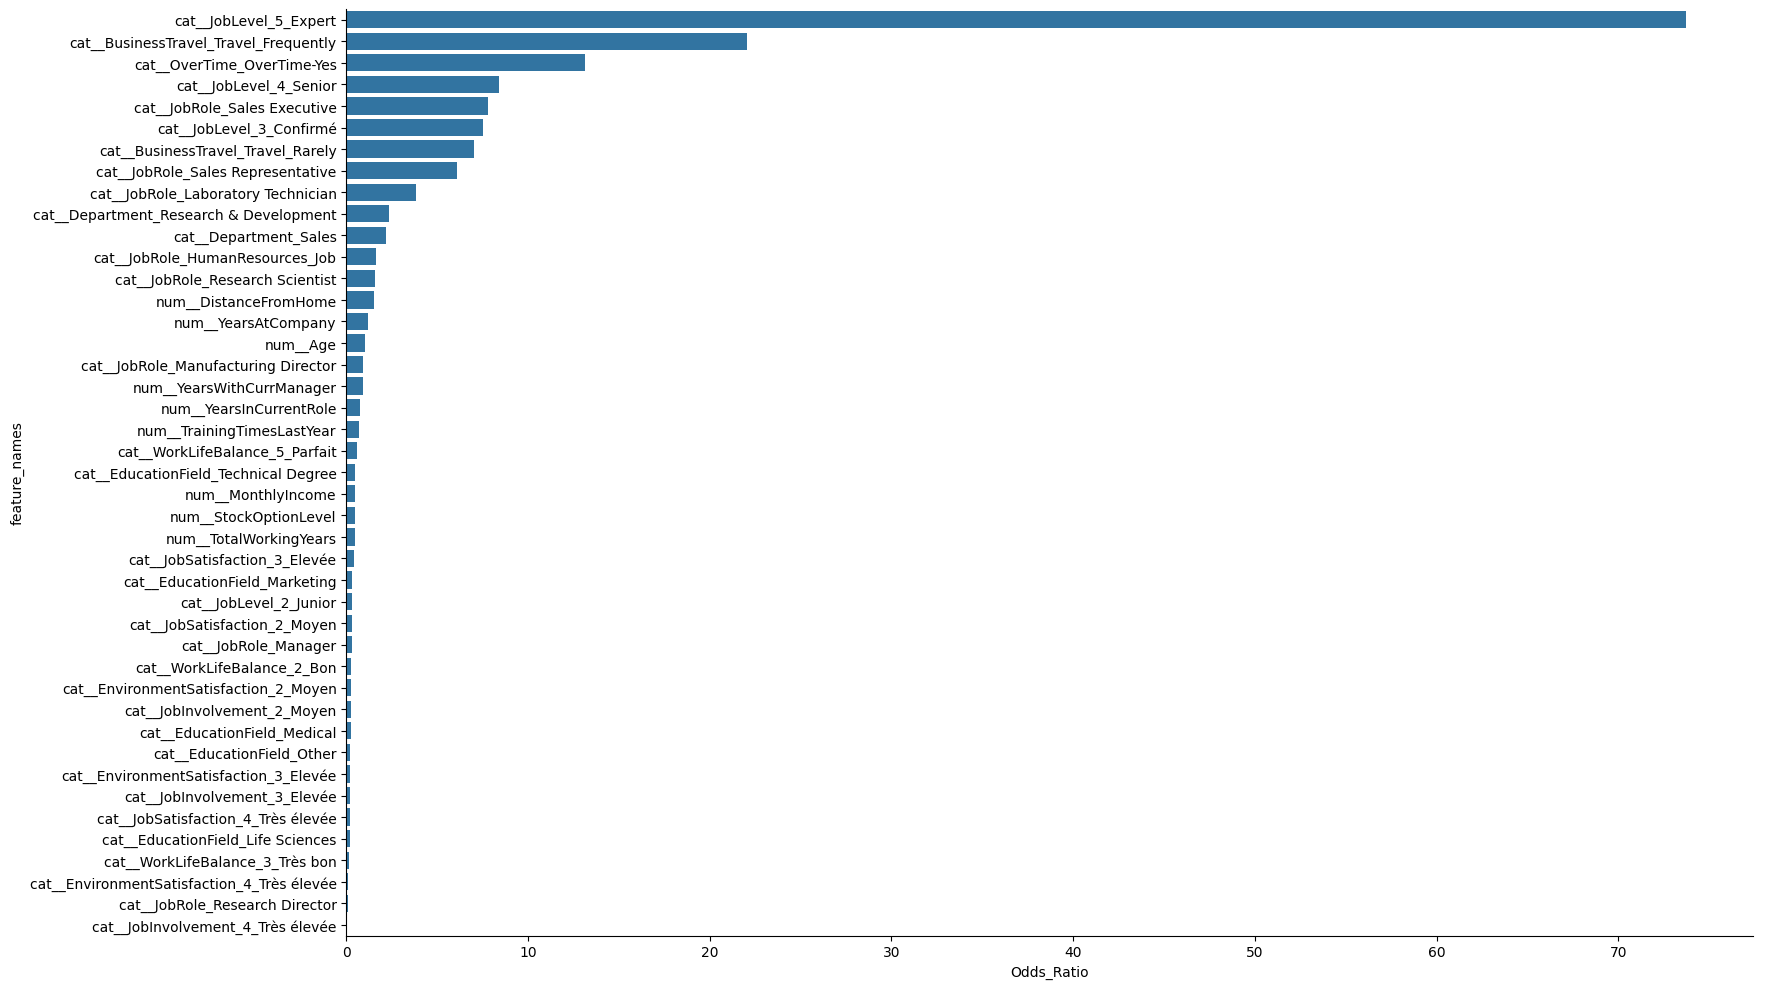

In [88]:
# Set coefficient to absolute values to rank features
#feature_importance_LR["coefficients_LR"] = feature_importance_LR["coefficients_LR"].abs()

# Visualize ranked features using seaborn
print("Features importance Logistic Regression by Odds_Ratio")
sns.catplot(x="Odds_Ratio", 
            y="feature_names", 
            data=feature_importance_LR.sort_values(by="Odds_Ratio", ascending=False), 
            kind="bar",
            height=10,
            aspect=16/9) # Resize graph

In [89]:
print("Odds Ratios :")
print(odds_ratios)



Odds Ratios :
[2.20474045e+01 7.03425225e+00 2.32899301e+00 2.20440389e+00
 1.69760147e-01 3.20698673e-01 2.31287793e-01 1.99450722e-01
 4.92606019e-01 2.34346254e-01 1.92806695e-01 9.29272535e-02
 2.32392711e-01 1.84345223e-01 4.51449057e-02 3.12630309e-01
 7.53118594e+00 8.38154479e+00 7.37148447e+01 3.08261107e-01
 3.90061353e-01 1.79256511e-01 1.65402267e+00 3.85078160e+00
 3.04373140e-01 9.15035253e-01 6.40875278e-02 1.55724521e+00
 7.81175249e+00 6.10388715e+00 1.31143466e+01 2.58476975e-01
 1.66170432e-01 5.83458037e-01 1.02376412e+00 1.54324964e+00
 4.79845239e-01 4.66778952e-01 4.46458968e-01 7.14012921e-01
 1.16196197e+00 7.31635162e-01 8.98903290e-01]


In [ ]:
# Calcul des p-values approximatives via statsmodels (ajout d'une constante pour l'intercept)
X_train_scaled_with_intercept = sm.add_constant(X_train_resampled)

# Ajustement du modèle avec statsmodels pour obtenir les p-values
logit_model = sm.Logit(y_train_resampled, X_train_scaled_with_intercept)
result = logit_model.fit()


In [91]:
p_values = result.pvalues[1:]  # Exclusion de l'intercept

# Feature importance avec p-value
feature_importance_LR_2 = pd.DataFrame({
    "feature_names": new_columns,
    "Odds_Ratio": odds_ratios,
    "p_values": p_values
    })
print(feature_importance_LR_2)


                                 feature_names  Odds_Ratio      p_values
0        cat__BusinessTravel_Travel_Frequently   22.047405  7.831139e-14
1            cat__BusinessTravel_Travel_Rarely    7.034252  3.926897e-07
2       cat__Department_Research & Development    2.328993  7.732935e-01
3                        cat__Department_Sales    2.204404  7.963440e-01
4            cat__EducationField_Life Sciences    0.169760  1.841773e-02
5                cat__EducationField_Marketing    0.320699  1.178392e-01
6                  cat__EducationField_Medical    0.231288  4.641958e-02
7                    cat__EducationField_Other    0.199451  3.982949e-02
8         cat__EducationField_Technical Degree    0.492606  2.779452e-01
9         cat__EnvironmentSatisfaction_2_Moyen    0.234346  3.325111e-09
10       cat__EnvironmentSatisfaction_3_Elevée    0.192807  2.192891e-12
11  cat__EnvironmentSatisfaction_4_Très élevée    0.092927  6.061213e-21
12                 cat__JobInvolvement_2_Moyen    0

In [92]:
                                              ################ DECISION TREE ##################

In [ ]:
"""
# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
    }

# Instancier le modèle
DT_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Instancier le GridSearchCV
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, 
                           cv=10, scoring='recall', n_jobs=-1, verbose=1)

# Appliquer GridSearchCV pour trouver les meilleurs paramètres
grid_search.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs paramètres et le score associé
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# Utiliser le meilleur modèle trouvé
best_DT_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best_DT = best_DT_model.predict(X_test_transformed)
print("Accuracy sur test set avec meilleur modèle : ", accuracy_score(y_test_transformed, y_pred_best_DT))
"""


In [94]:
# RESULTATS OBTENUS :
# Fitting 10 folds for each of 72 candidates, totalling 720 fits
# Meilleurs paramètres trouvés :  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
# Meilleur score :  0.9060975609756097
# Accuracy sur test set avec meilleur modèle :  0.8

In [95]:
# Training model            

print("Training model...")
DT_classifier = DecisionTreeClassifier(criterion = 'gini', max_depth= 5 ,min_samples_leaf= 1, 
                                       min_samples_split= 2, class_weight='balanced', random_state=42)
DT_classifier.fit(X_train_resampled, y_train_resampled)
print("...Done.")

Training model...
...Done.


In [96]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_DT = DT_classifier.predict(X_train_resampled)
print("...Done.")
print()

Predictions on train set...
...Done.



In [97]:
# Testing model

In [98]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred_DT = DT_classifier.predict(X_test_transformed)
print("...Done.")
print()

Predictions on test set...
...Done.



In [99]:
### evaluate model ###

--- Assessment of performances ---


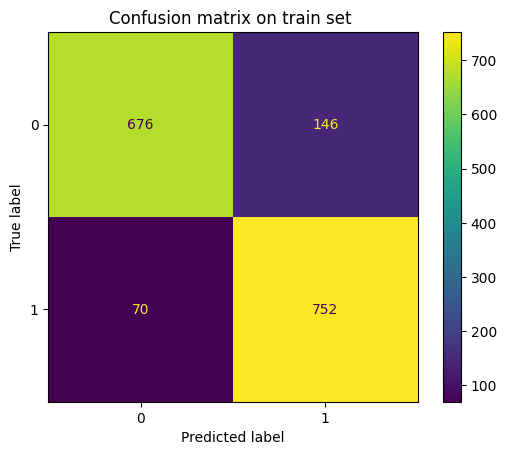

accuracy-score on train set DT :  0.8686131386861314
[[676 146]
 [ 70 752]]


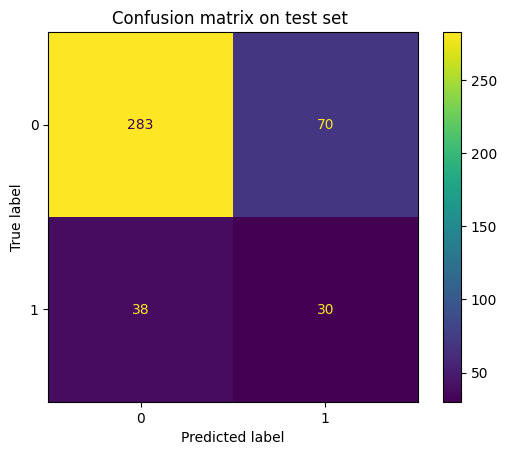

accuracy-score on test set DT :  0.7434679334916865
[[283  70]
 [ 38  30]]


In [100]:
### Assessment of performances ###          
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_DT_train = confusion_matrix(y_train_resampled, y_train_pred_DT, labels=DT_classifier.classes_)
cm_display_DT_train = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_train_pred_DT)
cm_display_DT_train.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set DT : ", DT_classifier.score(X_train_resampled, y_train_resampled))
cm_array_DT_train = np.array(cm_DT_train)
print(cm_array_DT_train)

cm_DT_test = confusion_matrix(y_test_transformed, y_test_pred_DT, labels=DT_classifier.classes_)
cm_display_DT_test = ConfusionMatrixDisplay.from_predictions(y_test_transformed, y_test_pred_DT)
cm_display_DT_test.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set DT : ", DT_classifier.score(X_test_transformed, y_test_transformed))
cm_array_DT_test = np.array(cm_DT_test)
print(cm_array_DT_test)

In [101]:
def evaluate_model(DT_classifier, X_train_resampled, X_test_transformed, y_train_resampled, y_test_transformed):
    # Mesurer le temps d'entraînement
    DT_start_train_time = time.time()
    DT_classifier.fit(X_train_resampled, y_train_resampled)
    DT_train_time = time.time() - DT_start_train_time

    # Mesurer le temps de prédiction
    DT_start_predict_time = time.time()
    DT_predict_time = time.time() - DT_start_predict_time
    
    # Calculer les métriques
    
    DT_precision = round(precision_score(y_test_transformed, y_test_pred_DT, average='binary', zero_division=0),2)
    DT_recall = round(recall_score(y_test_transformed, y_test_pred_DT, average='binary'),2)
    DT_f1 = round(f1_score(y_test_transformed, y_test_pred_DT, average='binary'),2)
    
    # Calculer l'AUC (si c'est une classification binaire)
    if len(set(y_test_transformed)) == 2: # Vérifier si c'est une classification binaire
        DT_auc = round(roc_auc_score(y_test_transformed, DT_classifier.predict_proba(X_test_transformed)[:, 1]),2)
    else:
        DT_auc = None
    
    
    
    return {
        
        'precision': DT_precision,
        'recall': DT_recall,
        'f1_score': DT_f1,
        'auc': DT_auc,
        'train_time': DT_train_time,
        'predict_time': DT_predict_time,
        
    }



In [102]:
print("Evaluation du modèle : DECISION TREE")
DT_metrics = evaluate_model(DT_classifier, X_train_resampled, X_test_transformed, y_train_resampled, y_test_transformed)
print("accuracy-score on train set : ", DT_classifier.score(X_train_resampled, y_train_resampled))
print("accuracy-score on test set : ", DT_classifier.score(X_test_transformed, y_test_transformed))
print("matrice de confusion sur le train",cm_array_DT_train)
print("matrice de confusion sur le test",cm_array_DT_test)
DT_metrics

Evaluation du modèle : DECISION TREE
accuracy-score on train set :  0.8686131386861314
accuracy-score on test set :  0.7434679334916865
matrice de confusion sur le train [[676 146]
 [ 70 752]]
matrice de confusion sur le test [[283  70]
 [ 38  30]]


{'precision': 0.3,
 'recall': 0.44,
 'f1_score': 0.36,
 'auc': np.float64(0.68),
 'train_time': 0.012172460556030273,
 'predict_time': 2.384185791015625e-07}

In [103]:
                                                    ################ RANDOM FOREST ##################

In [ ]:
"""
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10,15, None],
    'min_samples_split': [2, 5, 7,10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
    }

# Instancier le modèle
RF_classifier = RandomForestClassifier(class_weight= 'balanced',random_state=42)

# Instancier le GridSearchCV
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, 
                           cv=10, scoring='recall', n_jobs=-1, verbose=2)

# Appliquer GridSearchCV pour trouver les meilleurs paramètres
grid_search.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs paramètres et le score associé
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

# Utiliser le meilleur modèle trouvé
best_RF_model = grid_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_best_RF = best_RF_model.predict(X_test_transformed)
print("Accuracy sur test set avec meilleur modèle : ", accuracy_score(y_test_transformed, y_pred_best_RF))

"""

In [105]:
# RESULTATS OBTENUS
#Fitting 10 folds for each of 324 candidates, totalling 3240 fits
#Meilleurs paramètres trouvés :  {'class_weight': {0: 1, 1: 0.3}, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
#Meilleur score :  0.921951219512195
#Recall sur test set avec meilleur modèle :  0.27941176470588236

#Fitting 20 folds for each of 36 candidates, totalling 720 fits
#Meilleurs paramètres trouvés :  {'class_weight': {0: 1, 1: 0.7}, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
#Meilleur score :  0.9389028004828537
#Recall sur test set avec meilleur modèle :  0.27941176470588236

In [ ]:
"""
from sklearn.model_selection import cross_validate

# Utiliser le meilleur modèle trouvé via GridSearchCV
best_rf_model = grid_search.best_estimator_

# Effectuer une validation croisée et obtenir plusieurs métriques
cv_results = cross_validate(best_rf_model, X_train_resampled, y_train_resampled, cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1'], 
                            return_train_score=False)

# Afficher les résultats de la validation croisée
print("Validation croisée - Résultats :")
print(f"Accuracy - Moyenne : {cv_results['test_accuracy'].mean()} ± {cv_results['test_accuracy'].std()}")
print(f"Precision - Moyenne : {cv_results['test_precision'].mean()} ± {cv_results['test_precision'].std()}")
print(f"Recall - Moyenne : {cv_results['test_recall'].mean()} ± {cv_results['test_recall'].std()}")
print(f"F1-score - Moyenne : {cv_results['test_f1'].mean()} ± {cv_results['test_f1'].std()}")
"""


In [107]:
# RESULTATS OBTENUS :
# Validation croisée - Résultats :
# Accuracy - Moyenne : 0.939009472663534 ± 0.08858547738569567
#Precision - Moyenne : 0.9707575990664621 ± 0.010583434866128474
#Recall - Moyenne : 0.9060975609756097 ± 0.18477118991725527
#F1-score - Moyenne : 0.9253727894400917 ± 0.11635972721387021

In [108]:
# Training model     RANDOM FOREST      
print("Training model...")
RF_classifier = RandomForestClassifier(n_estimators=50, 
                                       criterion= 'gini',
                                      class_weight= 'balanced', 
                                      max_depth=10,  
                                      min_samples_split=3, 
                                      min_samples_leaf=1)
RF_classifier.fit(X_train_resampled, y_train_resampled)

print("...Done.")

Training model...
...Done.


In [109]:
# Predictions on training set et test set
print("Predictions on train set...")
y_train_pred_RF = RF_classifier.predict(X_train_resampled)

print("Predictions on test set...")
y_test_pred_RF = RF_classifier.predict(X_test_transformed)
print("...Done.")

Predictions on train set...
Predictions on test set...
...Done.


In [110]:
### evaluate model ###

--- Assessment of performances ---


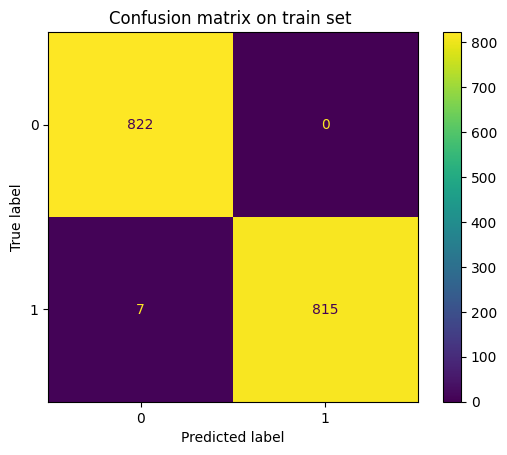

accuracy-score on train set RF:  0.995742092457421
[[822   0]
 [  7 815]]


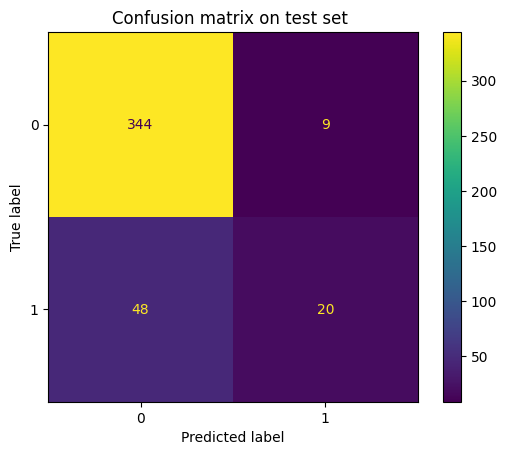

accuracy-score on test set RF:  0.8646080760095012
[[344   9]
 [ 48  20]]


In [111]:
### Assessment of performances ###      
print("--- Assessment of performances ---")

# Plot confusion matrix
cm_RF_train = confusion_matrix(y_train_resampled, y_train_pred_RF, labels=RF_classifier.classes_)
cm_display_RF_train = ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_train_pred_RF)
cm_display_RF_train.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set RF: ", RF_classifier.score(X_train_resampled, y_train_resampled))
cm_array_RF_train = np.array(cm_RF_train)
print(cm_array_RF_train)


cm_RF_test = confusion_matrix(y_test_transformed, y_test_pred_RF, labels=RF_classifier.classes_)
cm_display_RF_test = ConfusionMatrixDisplay.from_predictions(y_test_transformed, y_test_pred_RF)
cm_display_RF_test.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set RF: ", RF_classifier.score(X_test_transformed, y_test_transformed))
cm_array_RF_test = np.array(cm_RF_test)
print(cm_array_RF_test)



In [112]:
def evaluate_model(RF_classifier, X_train_resampled, X_test_transformed, Y_train_resampled, y_test_transformed):
    # Mesurer le temps d'entraînement
    RF_start_train_time = time.time()
    RF_classifier.fit(X_train_resampled, y_train_resampled)
    RF_train_time = time.time() - RF_start_train_time

    # Mesurer le temps de prédiction
    RF_start_predict_time = time.time()
    y_pred_RF = RF_classifier.predict(X_test_transformed)
    RF_predict_time = time.time() - RF_start_predict_time
    
    # Calculer les métriques
    
    RF_precision = round(precision_score(y_test_transformed, y_test_pred_RF, average='binary', zero_division=0),2)
    RF_recall = round(recall_score(y_test_transformed, y_test_pred_RF, average='binary'),2)
    RF_f1 = round(f1_score(y_test_transformed, y_test_pred_RF, average='binary'),2)
    
    # Calculer l'AUC (si c'est une classification binaire)
    if len(set(y_test_transformed)) == 2: # Vérifier si c'est une classification binaire
        RF_auc = roc_auc_score(y_test_transformed, RF_classifier.predict_proba(X_test_transformed)[:, 1])
    else:
        RF_auc = None
    
   
    
    return {
        
        'precision': RF_precision,
        'recall': RF_recall,
        'f1_score': RF_f1,
        'auc': RF_auc,
        'train_time': RF_train_time,
        'predict_time': RF_predict_time,
        
    }



In [113]:
print("Evaluation du modèle : Random Forest ")
RF_metrics = evaluate_model(RF_classifier, X_train_resampled, X_test_transformed, y_train_resampled, y_test_transformed)
print("accuracy-score on train set : ", RF_classifier.score(X_train_resampled, y_train_resampled))
print("accuracy-score on test set : ", RF_classifier.score(X_test_transformed, y_test_transformed))
print("matrice de confusion sur le train",cm_array_RF_train)
print("matrice de confusion sur le test",cm_array_RF_test)
RF_metrics

Evaluation du modèle : Random Forest 
accuracy-score on train set :  0.9993917274939172
accuracy-score on test set :  0.8646080760095012
matrice de confusion sur le train [[822   0]
 [  7 815]]
matrice de confusion sur le test [[344   9]
 [ 48  20]]


{'precision': 0.69,
 'recall': 0.29,
 'f1_score': 0.41,
 'auc': np.float64(0.7709965005832361),
 'train_time': 0.16103506088256836,
 'predict_time': 0.0039975643157958984}

In [114]:
#Evaluation du modèle : Random Forest 
#accuracy-score on train set :  0.9963369963369964
#accuracy-score on test set :  0.8547619047619047
#matrice de confusion sur le train [[819   0]
# [ 11 808]]
#matrice de confusion sur le test [[339  13]
# [ 52  16]]
#{'precision': 0.55,
# 'recall': 0.24,
# 'f1_score': 0.33,
# 'auc': np.float64(0.778283756684492),
# 'train_time': 0.34858059883117676,
# 'predict_time': 0.0074002742767333984}

In [115]:
# resultats obtenus avec différentes configurations :

In [116]:
#RF_classifier = RandomForestClassifier(n_estimators=100, 
#                                      class_weight= {0: 0.9, 1: 0.6}, 
#                                      max_depth=9,  # Choisis une valeur pour max_depth, par exemple 10
#                                      min_samples_split=2, 
#                                      min_samples_leaf=1)
#{'precision': 0.625,
# 'recall': 0.29411764705882354,
# 'f1_score': 0.4,
# 'auc': np.float64(0.7929896390374331),
# 'train_time': 0.23347806930541992,
# 'predict_time': 0.010115385055541992}


# RandomForestClassifier(n_estimators=200, 
#                         class_weight= {0: 1, 1: 0.5}, 
#                         max_depth=10,  # Choisis une valeur pour max_depth, par exemple 10
#                         min_samples_split=2, 
#                         min_samples_leaf=1)
# #{'precision': 0.6428571428571429,
# 'recall': 0.2647058823529412,
# 'f1_score': 0.375,
# 'auc': np.float64(0.8013870320855615),
# 'train_time': 0.46303296089172363,
# 'predict_time': 0.01327824592590332}


#RandomForestClassifier(n_estimators=100, 
#                                      class_weight= {0: 0.9, 1: 0.5}, 
#                                      max_depth=9,  # Choisis une valeur pour max_depth, par exemple 10
#                                      min_samples_split=2, 
#                                      min_samples_leaf=1)
#{'precision': 0.6923076923076923,
# 'recall': 0.2647058823529412,
# 'f1_score': 0.3829787234042553,
# 'auc': np.float64(0.7938669786096256),
# 'train_time': 0.2294788360595703,
# 'predict_time': 0.007431983947753906}